# Analysis of  RPM basal-organoid-derived allograft tumours
## Ireland et al., 2025
### Related to Fig. 1 and Extended Data Fig. 4e  

Modified version of [original file (Fig2e_ExtFig4e_RPM_Allos_Final_Clean.ipynb) from GitHub](https://github.com/TGOliver-lab/Ireland_Basal_SCLC_2025/blob/main/Python_Code/Fig2e_ExtFig4e_RPM_Allos_Final_Clean.ipynb)  

* Fig 1j
* Extended Data Fig 4e


In [1]:
#Import relevant packages
import numpy as np
import pandas as pd
from matplotlib import rcParams
import os
import scanpy as sc

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm # color maps
from matplotlib.pyplot import rc_context

#For nice color schemes
import cmocean

#For barplots
import seaborn as sns

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, dpi_save=300, facecolor='white')

### Load data

In [3]:
adata3 = sc.read_h5ad("../data/042725_RPM_TBOAllos_OriginalandAllo3_adata3_5kHVG_subsamplebycluster.h5ad")
adata3


AnnData object with n_obs × n_vars = 4435 × 55491
    obs: 'Genotype', 'GenoCT', 'Model', 'Cre', 'UnID', 'Batch', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'n_genes', 'log1p_total_counts', 'leiden_scVI_1.1', 'cluster', 'leiden_scVI_1.2', 'leiden_scVI_1.3'
    var: 'gene_ids', 'feature_types', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean_', 'frac_zero'
    uns: 'GenoCT_colors', 'Genotype_colors', 'UnID_colors', 'hvg', 'leiden', 'leiden_scVI_1.1_colors', 'leiden_scVI_1.3_colors', 'neighbors', 'umap'
    obsm: 'X_scVI_1.1', 'X_scVI_1.2', 'X_scVI_1.3', 'X_umap'
    varm: 'df_poisson'
    layers: 'counts', 'norm'
    obsp: 'connectivities', 'distances'

### Plot data in UMAP
Leiden clustering in **Fig 1j**  

<Axes: title={'center': 'cluster'}, xlabel='UMAP1', ylabel='UMAP2'>

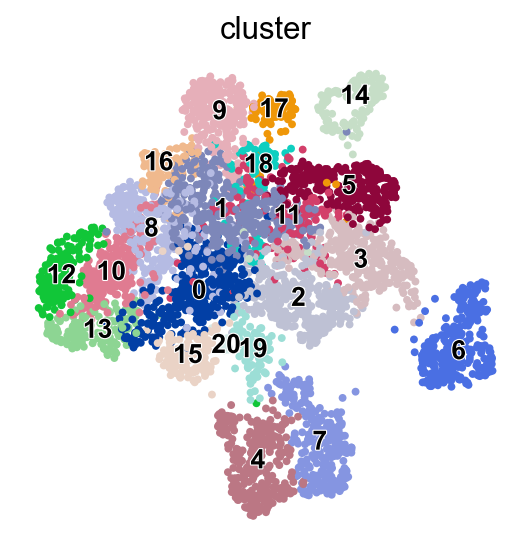

In [4]:
sc.pl.umap(
    adata3,
    color=['cluster'],
    use_raw=False,
    legend_loc="on data",
    legend_fontsize=12,
    legend_fontoutline=1,
    color_map="cmo.dense",
    ncols=6,
    frameon=False,
    vmax="p99.9",
    layer="norm",
    s=50,
    show=False,
    return_fig=False
)

/var/folders/92/7ylp4dyx3yqgjqr8flnjz0hw0000gn/T/ipykernel_36929/1219997445.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


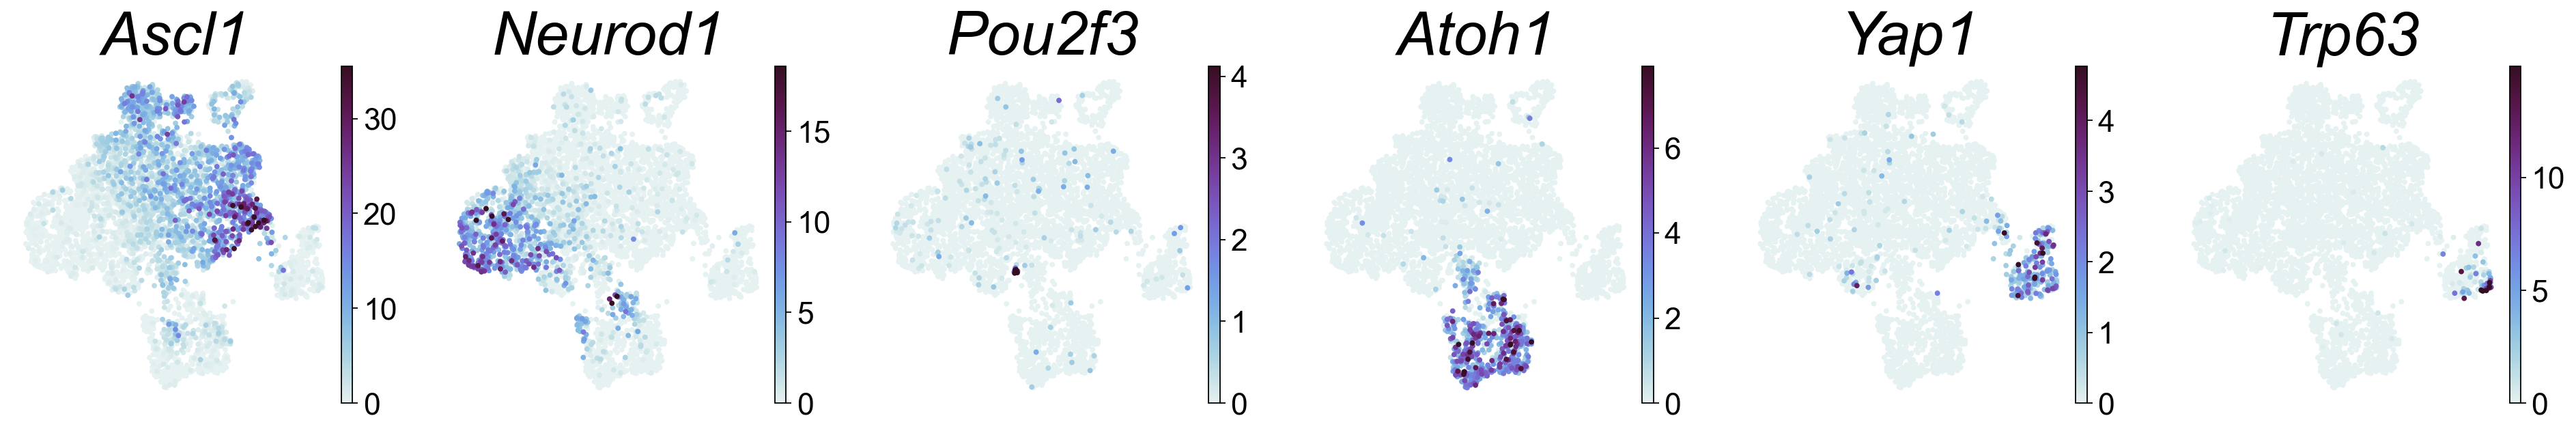

In [5]:
# Visualize marker genes
genes = ['Ascl1','Neurod1','Pou2f3','Atoh1',
         'Yap1','Trp63']

plt.rcParams['figure.figsize'] = [10, 8]
sc.set_figure_params(scanpy=True, fontsize=20)

# Plot without showing immediately
g = sc.pl.umap(
    adata3,
    color=genes,
    use_raw=False,
    legend_loc="right margin",
    color_map="cmo.dense",
    ncols=6,
    frameon=False,
    vmax="p99.9",
    layer="norm",
    s=50,
    show=False,
    return_fig=True
)

# Make gene names (titles) larger and italic
for ax in g.axes:
    ax.set_title(ax.get_title(), fontsize=40, fontstyle='italic')

plt.tight_layout()
plt.show()

### Extended Data **Fig. 4e**
WT and RPM allografts

computing PCA
    with n_comps=50


/Users/darren/conda/envs/scrnaseq312/lib/python3.12/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 55491 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


    finished (0:00:00)
Storing dendrogram info using `.uns['dendrogram_leiden_scVI_1.3']`


/var/folders/92/7ylp4dyx3yqgjqr8flnjz0hw0000gn/T/ipykernel_36929/1462734076.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


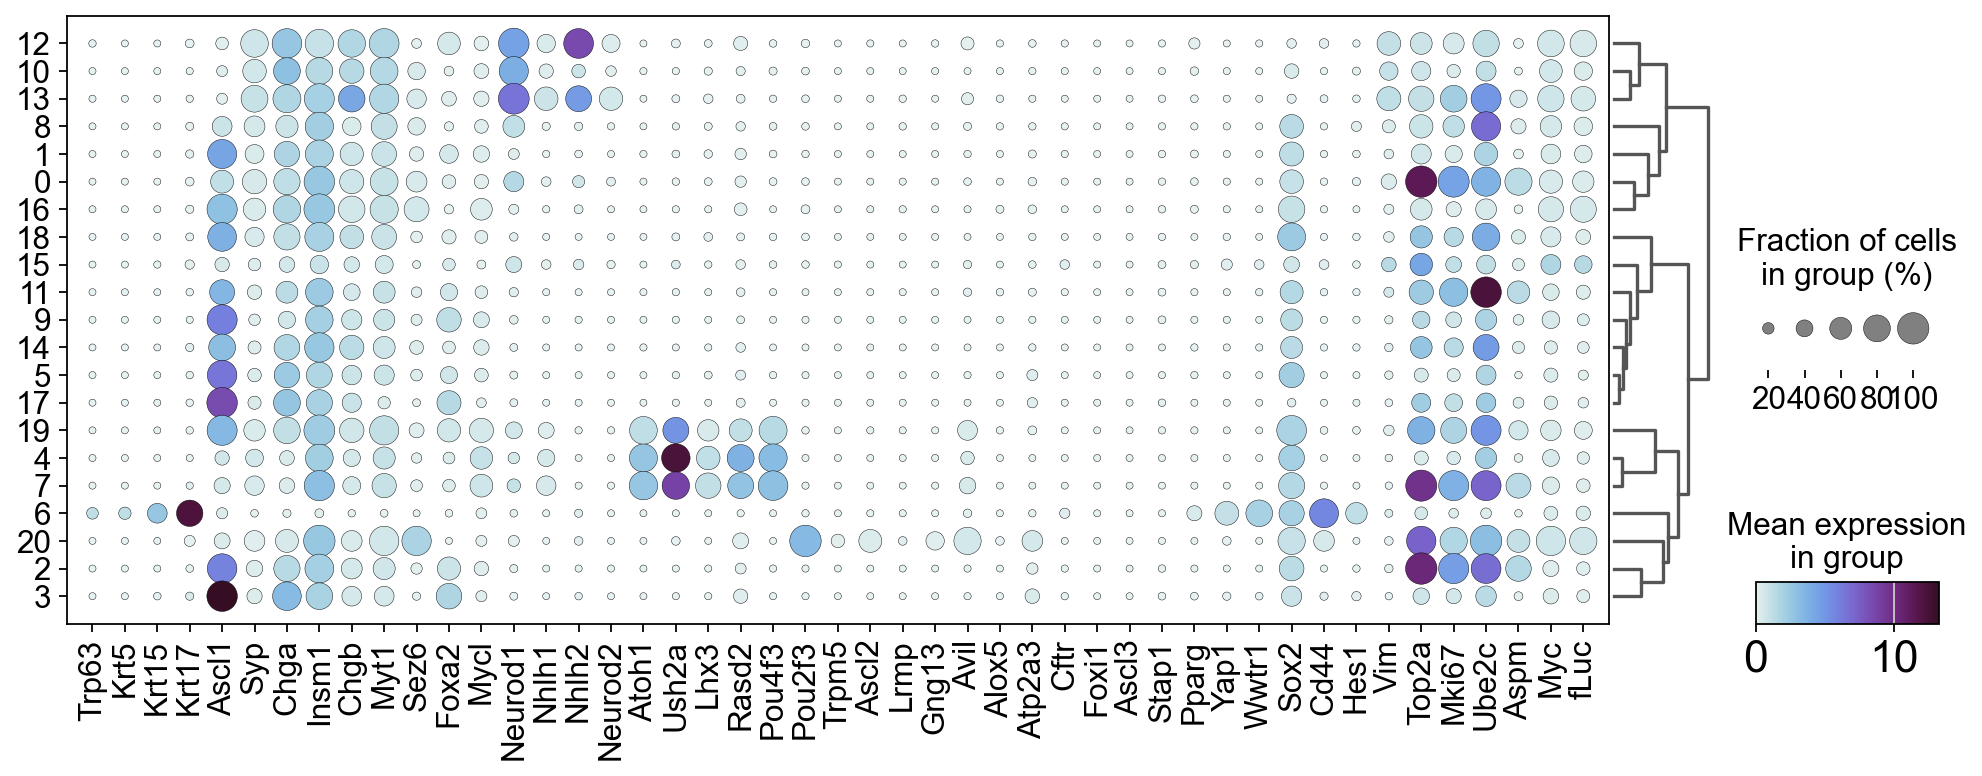

In [6]:
# Dot plot for Extended Data Fig. 4e
more_types=["Trp63","Krt5","Krt15","Krt17",#basal
            "Ascl1", "Syp","Chga","Insm1","Chgb","Myt1","Sez6","Foxa2","Mycl", #NE
              "Neurod1","Nhlh1","Nhlh2","Neurod2", #neuronal
            'Atoh1','Ush2a','Lhx3','Rasd2','Pou4f3', # Atoh1/Inner Ear
            'Pou2f3','Trpm5','Ascl2','Lrmp','Gng13','Avil','Alox5','Atp2a3', #tuft
              "Cftr",'Foxi1', "Ascl3", 'Stap1','Pparg', #ionocyte
              'Yap1','Wwtr1','Sox2','Cd44','Hes1',"Vim", # Stem-like/#Mesenchymal/Yap
             "Top2a","Mki67", "Ube2c","Aspm", #Proliferation
            'Myc',"fLuc"] #tumor markers

# Dot plot for Extended Data Fig. 4e
sc.set_figure_params(scanpy=True, fontsize=17)  # controls default font sizes

dotplot = sc.pl.dotplot(
    adata3,
    var_names=more_types,
    groupby='leiden_scVI_1.3',
    use_raw=False,
    layer="norm",
    figsize=[15, 5],
    show=False,
    color_map="cmo.dense",
    var_group_rotation=35,
    smallest_dot=10,
    dendrogram=True
)

# Increase x-axis label size
plt.xticks(fontsize=20)  # adjust size as needed
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()